In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [8]:
df = pd.read_csv('data_youtube.csv', header = 0)
df.head(3)

,video_channelId,video_channelTitle,video_channelSubscriber,video_id,video_title,video_publishedAt,video_description,video_thumbnails,video_tags,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_duration_teaser,video_id_mv_official,video_title_mv_official,video_publishedAt_mv_official,video_duration_mv_official,video_viewCount_mv_official
0,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,68700000,8skl6AxMyec,LE SSERAFIM (르세라핌) 'ANTIFRAGILE' M/V TEASER 2,2022-10-15 15:00:00+00:00,Creative Director : NU KIM\n\nVisual Creative ...,https://i.ytimg.com/vi/8skl6AxMyec/default.jpg,"['HYBE', 'HYBE LABELS', '하이브', '하이브레이블즈']",10,3137281.0,253153.0,5410.0,PT20S,pyf8cbqyfPs,LE SSERAFIM (르세라핌) 'ANTIFRAGILE' OFFICIAL M/V,2022-10-16 14:58:08+00:00,PT3M52S,49994575.0
1,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,68700000,gKwXG4Cpgw0,LE SSERAFIM (르세라핌) 'ANTIFRAGILE' M/V TEASER 1,2022-10-13 15:00:00+00:00,Creative Director : NU KIM\n\nVisual Creative ...,https://i.ytimg.com/vi/gKwXG4Cpgw0/default.jpg,"['HYBE', 'HYBE LABELS', '하이브', '하이브레이블즈']",10,2108775.0,180257.0,4188.0,PT30S,pyf8cbqyfPs,LE SSERAFIM (르세라핌) 'ANTIFRAGILE' OFFICIAL M/V,2022-10-16 14:58:08+00:00,PT3M52S,49994575.0
2,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,68700000,3KZ8sj8b-X0,ZICO (지코) '괴짜 (Freak)' MV Teaser,2022-07-25 09:00:17+00:00,ZICO (지코) '괴짜 (Freak)' MV Teaser\n\n[Grown Ass...,https://i.ytimg.com/vi/3KZ8sj8b-X0/default.jpg,"['HYBE', 'HYBE LABELS', '하이브', '하이브레이블즈']",10,247959.0,28902.0,237.0,PT16S,dfYS9QBU-sc,ZICO (지코) '괴짜 (Freak)' Official MV,2022-07-27 09:54:22+00:00,PT16S,301411.0


#### Subcriber of each channel

In [9]:
df_channel = pd.DataFrame(df['video_channelTitle'].unique(), columns = ['channel'])
df_channel['subcribers']=0
for x in df_channel['channel']:
    df_channel.loc[df_channel['channel']==x, 'subcribers'] = df.loc[df['video_channelTitle']==x, 'video_channelSubscriber'].max()
df_channel

,channel,subcribers
0,HYBE LABELS,68700000
1,THEBLACKLABEL,2670000
2,SECHSKIES,545000
3,SMTOWN,31000000
4,TREASURE (트레저),6500000
5,BIGBANG,14900000
6,BLACKPINK,82700000
7,JYP Entertainment,25900000
8,iKON,8750000
9,WINNER,4000000


C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_16276/2044901250.py:6: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  plt.tight_layout()
C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_16276/2044901250.py:6: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  plt.tight_layout()
C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_16276/2044901250.py:6: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  plt.tight_layout()
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Progra

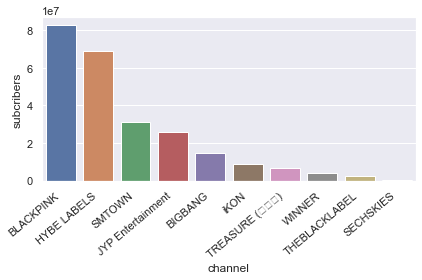

In [10]:
# plot bar chart
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="channel", y="subcribers", data=df_channel.sort_values(by='subcribers', ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#### Time publish teaser and time publish MV

In [11]:
#2018-07-19 01:00:01+00:00
df_time = pd.DataFrame()
df_time['trailer_time'] = pd.to_datetime(df['video_publishedAt']).dt.hour
df_time['mv_time'] = pd.to_datetime(df['video_publishedAt_mv_official']).dt.hour
df_time

,trailer_time,mv_time
0,15,14
1,15,14
2,9,9
3,9,9
4,9,9
...,...,...
683,0,9
684,1,7
685,1,7
686,7,7


C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_16276/21454455.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_time[x], bins=24, kde=False, rug=False, label=x)
C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_16276/21454455.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


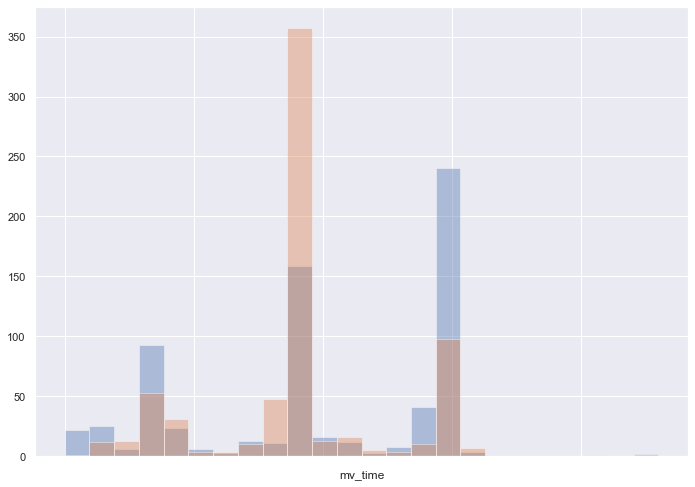

In [16]:
#plot histogram of video_publishedAt and video_publishedAt_mv_official

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
for x in df_time.columns:
    ax = sns.distplot(df_time[x], bins=24, kde=False, rug=False, label=x)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### Total view, like and comment of top 5 video has highest view

In [13]:
df_view = df[['video_title','video_viewCount','video_likeCount','video_commentCount']]
df_view = df_view.sort_values(by='video_viewCount', ascending=False).head(5)
df_view

,video_title,video_viewCount,video_likeCount,video_commentCount
556,BLACKPINK - 'Kill This Love' M/V Teaser,60822259.0,2596571.0,119077.0
555,BLACKPINK - 'How You Like That' M/V TEASER,33425194.0,2875556.0,155589.0
549,BLACKPINK - ‘Pink Venom’ M/V TEASER,30777565.0,2992467.0,250478.0
558,BLACKPINK - ‘뚜두뚜두 (DDU-DU DDU-DU)’ M/V TEASER,30418931.0,1903000.0,121836.0
553,BLACKPINK - 'Lovesick Girls' M/V TEASER,28550841.0,2367912.0,113840.0


c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46748 (\N{HANGUL SYLLABLE DDU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


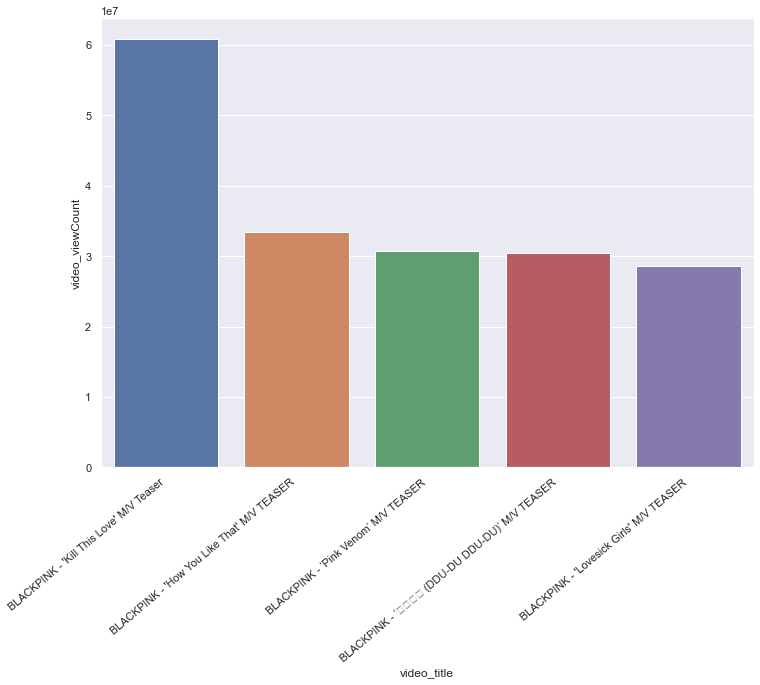

In [18]:
#plot bar chart of top 5 video with highest view count
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.barplot(x="video_title", y="video_viewCount", data=df_view)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### Distribution of video_viewCount,video_likeCount, video_commentCount using box plot

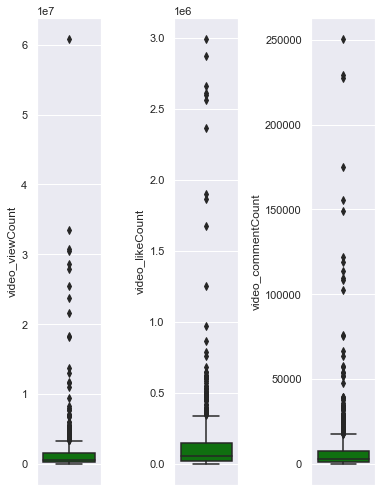

In [15]:
features = ['video_viewCount','video_likeCount','video_commentCount']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[features[i]],color='green',orient='v')
    plt.tight_layout();